# Iris Data Analysis

## Multiclass Classfication

### Each Traning point belongs to one of N different classes. the goal is to construct a function which, given a new data point, will correctly predict the class to which the new point belongs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\gmjj0\OneDrive\Documents\Data Science\Iris\iris_data.txt', sep=',')

In [3]:
df.info()
# 150 rows and 5 columns
# Zero missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df.apply(lambda x: sum(x.isnull()))
# Zero missing data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.apply(lambda x: len(x.unique()))

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [7]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Clustering Algorithm
### Clutering invovles various technique to find clusters or subgroups in the dataset. I will use K-means Clustering and Hierarchical clustering

In [9]:
df_no_response = df.drop(['species'], axis=1)
df_no_response.shape

(150, 4)

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_no_response = scaler.fit_transform(df_no_response)
model=KMeans(n_clusters=3)
model.fit(df_no_response)
label=model.predict(df_no_response)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


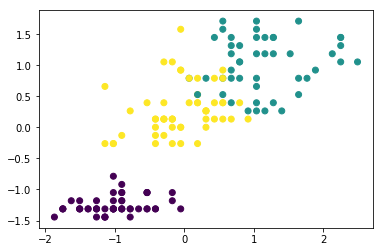

In [11]:
x = df_no_response[:,0]
y = df_no_response[:,3]
plt.scatter(x,y,c=label)

In [12]:
original_species = df['species']
original_species.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [13]:
cross_df = pd.DataFrame({'label':label,'species':original_species})
ct = pd.crosstab(cross_df['label'], cross_df['species'])
print(ct)

species  setosa  versicolor  virginica
label                                 
0            50           0          0
1             0          11         36
2             0          39         14


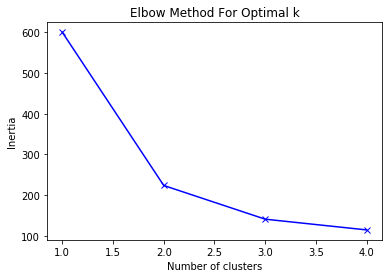

In [14]:
Inertia = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_no_response)
    Inertia.append(km.inertia_)

plt.plot(K, Inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

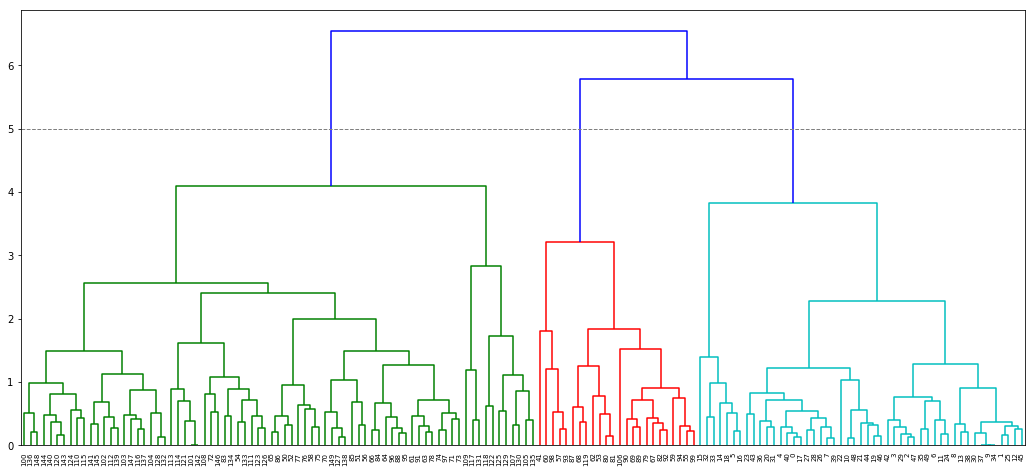

In [15]:
from scipy.cluster.hierarchy import linkage,dendrogram, fcluster
fig, ax= plt.subplots(figsize=(18,8))
mergings=linkage(df_no_response,method='complete')
dendrogram(mergings,leaf_rotation=90,leaf_font_size=7)
plt.axhline(y=5, c='grey', lw=1, linestyle='dashed')
plt.show()

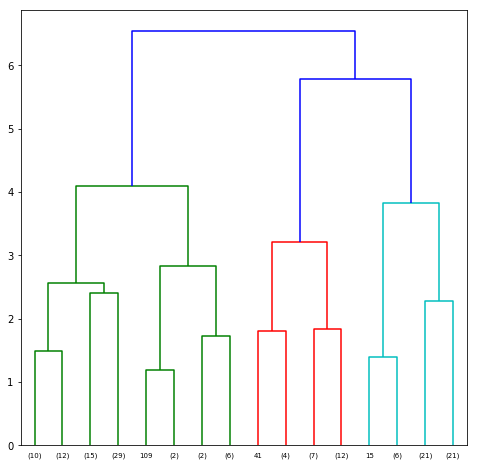

In [16]:
fig, ax= plt.subplots(figsize=(8,8))
dendrogram(mergings, truncate_mode = 'level', p=3,leaf_font_size=7)
plt.show()

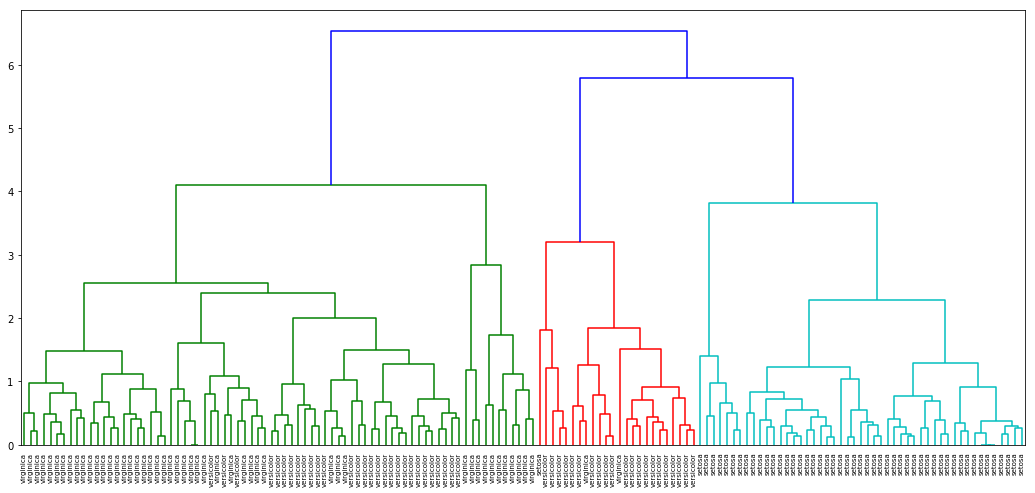

In [17]:
df2=df.set_index('species')
fig, ax= plt.subplots(figsize=(18,8))
mergings=linkage(df_no_response,method='complete')
dendrogram(mergings, labels=df2.index, leaf_rotation=90,leaf_font_size=7)
plt.show()

In [18]:
mergings=linkage(df_no_response,method='complete')
label_3 = fcluster(mergings, 3, criterion='distance')
pairs=pd.DataFrame({'labels':label_3, 'species':original_species})
pairs.sort_values('labels')

,labels,species
74,1,versicolor
104,1,virginica
103,1,virginica
102,1,virginica
101,1,virginica
100,1,virginica
97,1,versicolor
96,1,versicolor
95,1,versicolor
91,1,versicolor


(0, 5)

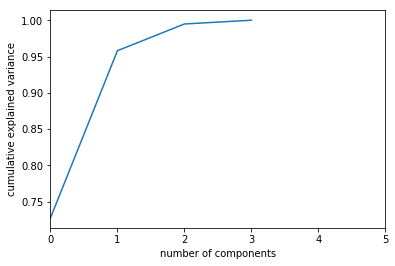

In [19]:
from sklearn.decomposition import PCA
pca=PCA().fit(df_no_response)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,5,1)

Text(0, 0.5, 'variance')

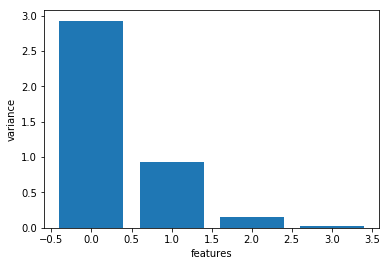

In [20]:
pca=PCA().fit(df_no_response)
features=range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('features')
plt.ylabel('variance')

In [21]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(df_no_response)
X_pca.shape

(150, 2)

Text(0.5, 1.0, 'Iris species after PCA')

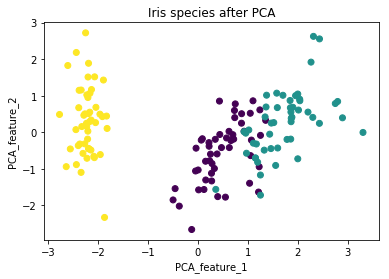

In [22]:
x_pca=X_pca[:,0]
y_pca=X_pca[:,1]
# to color code the clusters, I have number coded the species (this is the form accepted for color slection) 
d = {'versicolor':0, 'virginica':1, 'setosa':2}
labels = [d[spec] for spec in original_species]
plt.scatter(x_pca, y_pca, c=labels)
plt.xlabel('PCA_feature_1')
plt.ylabel('PCA_feature_2')
plt.title('Iris species after PCA' )